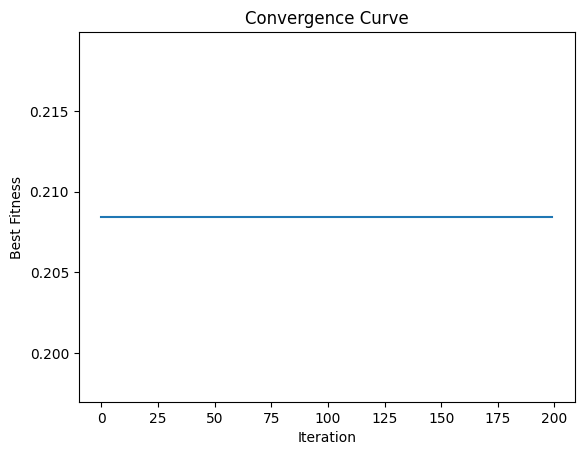

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return np.sum(x**2)

def levy_flight(step_size, dimensions):
    sigma = (np.power((np.math.gamma(1 + dimensions) * np.sin(np.pi * dimensions / 2)) /
                     (np.math.gamma((1 + dimensions) / 2) * dimensions**(1 / (2 * dimensions))), 1 / dimensions))
    u = np.random.normal(0, sigma, size=dimensions)
    v = np.random.normal(0, 1, size=dimensions)
    step = u / np.power(np.fabs(v), 1 / dimensions)
    return step * step_size

def cuckoo_search(objective_function, num_cuckoos, num_iterations, lower_bound, upper_bound, levy_flight_rate=1.5):
    population = np.random.uniform(lower_bound, upper_bound, (num_cuckoos, 2))
    best_solution = None
    best_fitness = float('inf')
    history = []

    for iteration in range(num_iterations):
        fitness = np.array([objective_function(x) for x in population])

        if np.min(fitness) < best_fitness:
            best_solution = population[np.argmin(fitness)]
            best_fitness = np.min(fitness)

        new_population = np.empty_like(population)
        for i in range(num_cuckoos):
            cuckoo = population[i]
            step = levy_flight(levy_flight_rate, 2)
            new_solution = cuckoo + step * (cuckoo - best_solution)
            new_solution = np.clip(new_solution, lower_bound, upper_bound)
            new_fitness = objective_function(new_solution)

            if new_fitness < fitness[i]:
                new_population[i] = new_solution
            else:
                new_population[i] = cuckoo

        population = new_population
        history.append(best_fitness)

    return best_solution, best_fitness, history

num_cuckoos = 100
num_iterations = 200
lower_bound = -5
upper_bound = 5

best_solution, best_fitness, history = cuckoo_search(objective_function, num_cuckoos, num_iterations, lower_bound, upper_bound)

plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('Convergence Curve')
plt.show()
